## statsmodel 이용한 레버리지 계산

In [75]:
import numpy as np
from sklearn.datasets import make_regression
import statsmodels.api as sm

## 명령어


* library: from sklearn.datasets import make_regression
    - Augmentation : sm.add_constant(x) x행렬에 상수항 column 추가 
      또는 np.vstack([x, np.array([num1,num2])]) ## vertical
      또는 np.hstack([y, np.array([num1,num2])]) ## horisonal
* library : import statsmodels.api as sm
    - OLS : model = sm.OLS(y,x) ## OLS 결과 분석
            result = model.fit() ## 모델 fitting 
            print(result.summary()) ## OLS 결과 분석 내용 출력
    - 영향도 정보객체: influence = result.get_influence()
    - 레버리지 벡터: hat = influence.hat_matrix_diag
    - 레버리지 그림: plt.stem(hat)
    - 레버리지 합:hat.sum() ## 차원, feature의 개수 + 상수항개수 1 을 나타냄
    - 선추가: sm.abline_plot(model_result = result, ax = ax)

    - Residual: result.resid
    - 잔차(x축),레버리지(y축) 그림:sm.grphics.plot_leverage_resid2(result)
    
    - Cook's distance 그림: sm.graphics.influence_plot(result, plot_alpha = 0.3) 
    
* library: from statsmodels.graphics import utils
    - Fox recommendation 영향도: cooks, pvals = influence.cooks_distance
    - Fox recommendation 정의: fox_r = 4/(len(y)-2) ## 4/N-K-1
    - Fox recommendation 기준으로 아웃라이어 기준정의: idx = np.where(cooks> fox_r)[0]
    - Fox recommendation 아웃라이어 그림: plt.scatter(X0[idx],y[idx], s=300, c='r', alpha = 0.5)

In [76]:
X0, y, coef = make_regression(n_samples = 100, n_features = 1, noise = 20, coef =True, random_state = 1)

data_100 = (4,100)
data_101 = (3,150)

X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])]) ## 참고 vertical stack
#np.array([data_100[:1],data_101[:1]])
X = sm.add_constant(X0)
X.shape
X0[-3:] ## X0 맨끝에 4와 3 의 값을 집어 넣음

array([[-0.19183555],
       [ 4.        ],
       [ 3.        ]])

In [77]:
y = np.hstack([y,[data_100[1], data_101[1]]])
y.shape
#y = np.hstack ## horizonal stack
y

array([ -5.55385928e+01,  -1.06619847e+01,   2.27574081e+01,
         1.01096129e+02,   1.44337558e+02,   3.32888330e+01,
         3.30152710e+01,  -2.58869694e+01,  -9.96391397e+01,
         2.38030714e+01,  -4.55886864e+01,  -8.33875709e+00,
        -9.53154191e+01,   3.64072963e+01,  -8.72926036e+01,
         6.76693724e+01,  -1.36866100e+01,  -5.54414224e+01,
        -6.53402399e+01,  -5.44497141e+01,  -2.88351332e+01,
         1.78835048e+02,   6.50839520e+01,   2.66683131e+01,
        -1.85459706e+01,  -4.14990408e+01,   8.55827764e-01,
         4.45616521e+01,   1.15984811e+02,  -6.46197993e+01,
        -2.59312718e+01,  -6.08820426e+01,   1.87195482e+01,
         7.50696998e+01,   1.17203175e+02,  -2.26982690e+01,
        -5.63625811e+01,   1.80837188e+02,  -1.92574950e+02,
         6.85032358e+01,   1.65522025e+02,   1.05000391e+02,
        -7.04338757e+01,  -5.87693362e+01,  -4.15757142e+01,
         7.32472269e+01,   4.09664082e+01,   8.04619460e+01,
        -2.87939943e+01,

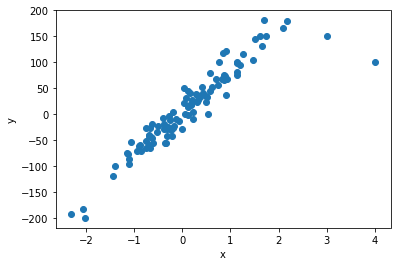

In [78]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.scatter(X0,y)
plt.xlabel('x')
plt.ylabel('y')

In [79]:
import pandas as pd
model = sm.OLS(pd.DataFrame(y),pd.DataFrame(X))
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     614.2
Date:                Mon, 16 Oct 2017   Prob (F-statistic):           1.74e-44
Time:                        03:38:12   Log-Likelihood:                -486.61
No. Observations:                 102   AIC:                             977.2
Df Residuals:                     100   BIC:                             982.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              2.2672      2.879      0.788      0.4

In [1]:
## get_influence() 영향도 정보객체 구하기 = 영향도 행렬임 
## hat_matrix_diag 레버리지 벡터 ( 영향도 행렬의 trace 들은 레버리지임 )

influence = result.get_influence()
hat = influence.hat_matrix_diag
hat ## 햇 메트릭스 = X 독립변수 벡터 * 가중치 벡터 

NameError: name 'result' is not defined

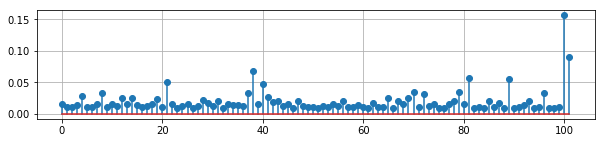

In [81]:
plt.figure(figsize = (10,2))
plt.stem(hat)
plt.grid()

In [82]:
hat.sum() ## 합이 2와 같아짐 ## 1차원 모형은 2가 됨 

2.0000000000000004

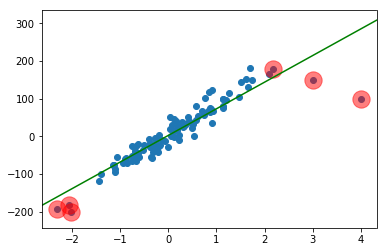

In [90]:
ax = plt.subplot() ## 흰도화지
plt.scatter(X0,y)
sm.graphics.abline_plot(model_results=result, ax=ax,color = 'g') ##라인그려줌

idx = hat > 0.05

plt.scatter(X0[idx],y[idx],s = 300, c ="r", alpha = 0.5)

0      -14.524555
1        4.713550
2      -14.072039
3       44.917283
4       34.544611
5        4.309312
6       -5.541281
7       19.335915
8       -3.105423
9       -0.795037
10      -2.788995
11      17.464010
12     -19.714759
13     -29.594698
14     -11.743442
15       6.823669
16     -10.607182
17     -32.787253
18     -20.158662
19      19.194693
20      -9.438667
21      21.940251
22       1.589896
23      10.371572
24       6.358341
25       4.606915
26      -5.005983
27       1.060768
28      25.078254
29     -13.513996
          ...    
72      33.894531
73       6.988851
74     -13.202002
75      22.982525
76     -30.726263
77      -1.863743
78      17.577938
79      24.865402
80      55.946443
81     -38.371178
82     -15.377992
83     -13.048200
84      34.298321
85      15.350900
86      -2.850711
87      -1.884276
88      16.120567
89     -59.170622
90     -28.066358
91      13.213284
92      -0.211755
93      -6.771469
94       1.795828
95      -5.137411
96      12

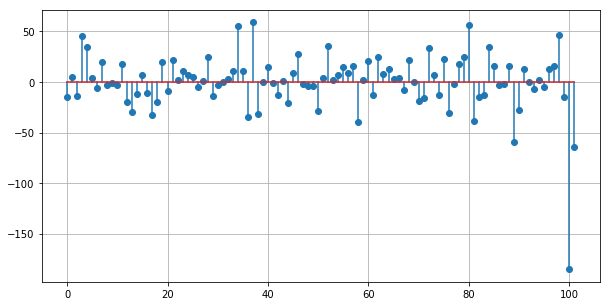

In [98]:
print(result.resid)
plt.figure(figsize = (10,5))
plt.stem(result.resid)
plt.grid()

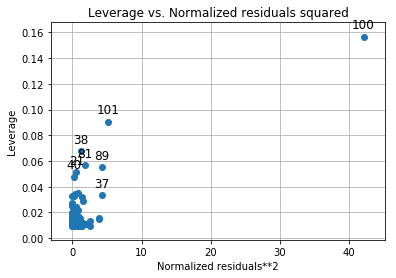

In [103]:
sm.graphics.plot_leverage_resid2(result)
plt.grid()

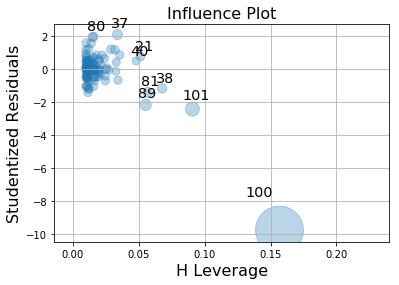

In [105]:
sm.graphics.influence_plot(result, plot_alpha = 0.3)
plt.grid()

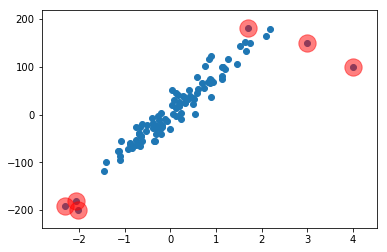

In [121]:
from statsmodels.graphics import utils

cooks, pvals = influence.cooks_distance

fox_r = 4/ (len(y)-2)
fox_r ## -1.9607843137254901

idx = np.where(cooks > fox_r)[0] ## 조건에맞는 값에대한 데이터번호 찾아줌

ax = plt.subplot() ## 흰도화지
plt.scatter(X0,y)
plt.scatter(X0[idx],y[idx],s=300,c='r',alpha = 0.5)
#utils.annotate_axes(range(len(idx)), idx, zip(X0[idx], y[idx]), [(-20, 15)] * len(idx), size="small", ax=ax)